# Customer Segmentation Part II : Feature engineering and Exploratory data analysis

## Topic

In the previous notebook we went through the nine datasets provided by Olist, we did some preliminary processing and merged the datasets all together. The result was a 48 column data frame. 

In this notebook, we dived a little deeper into the data by visualizing some of the key aspects and trends of the business, deleted irrelevant columns for machine learning algorithms and saved a csv file to be used in the next chapiter.

## Objectives
- Overall objective : 

Performe customer segmentation
- Current objective:

Visualise the important aspects of Olist's activity (to gain more understanding of it)

Arrange features and keep only the relevant among them for ML algorithms

## Summary
- Importing libraries
- Importing the dataset
- Feature engineering
- Exploratory data analysis:
   - Orders dataviz
   - Products dataviz
   - Sellers dataviz
   - Customers dataviz
   - Shippments dataviz
   - Revenue dataviz
- Correlations
- Conclusion

## Importing libraries

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime as dt
sns.set(rc = {'figure.figsize':(15,8)})

## Importing the dataset

In [57]:
treated_df  = pd.read_csv(r'C:\Users\imane\OneDrive\Desktop\Clients_Clustering\treated_df.csv', sep =",")
treated_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_difference,shipping_duration,...,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,product_category_name_english
0,2e7a8482f6fb09756ca50c10d7bfc047,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-04,2016-10-07,2016-10-18,2016-10-18,2016-10-20,2 days,44 days,...,b7d76e111c89f7ebf14761390f0f7d17,69309,boa vista,RR,1037,-23.545621,-46.639292,sao paulo,SP,furniture_decor
1,2e7a8482f6fb09756ca50c10d7bfc047,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-04,2016-10-07,2016-10-18,2016-10-18,2016-10-20,2 days,44 days,...,b7d76e111c89f7ebf14761390f0f7d17,69309,boa vista,RR,1037,-23.545621,-46.639292,sao paulo,SP,furniture_decor
2,35d3a51724a47ef1d0b89911e39cc4ff,27ab53f26192510ff85872aeb3759dcc,delivered,2016-10-04,2016-10-05,2016-10-14,2016-10-26,2016-12-20,55 days,22 days,...,f922896769e9517ea3c630f3c8de86d0,96832,santa cruz do sul,RS,1037,-23.545621,-46.639292,sao paulo,SP,furniture_decor
3,c4f710df20f7d1500da1aef81a993f65,4b671f05b6eb9dc1d2c1bae9c8c78536,delivered,2016-10-10,2016-10-10,2016-10-18,2016-10-26,2016-12-14,49 days,16 days,...,0ecf7f65b5ff3b9e61b637e59f495e0a,30411,belo horizonte,MG,1037,-23.545621,-46.639292,sao paulo,SP,furniture_decor
4,81e5043198a44ddeb226002ff55d8ad4,ddd15ef77c83eea8c534d2896173a927,delivered,2017-01-09,2017-01-09,2017-01-09,2017-02-24,2017-02-24,0 days,46 days,...,853ba75a0b423722ccf270eea3b4cfe4,21843,rio de janeiro,RJ,1037,-23.545621,-46.639292,sao paulo,SP,furniture_decor


In [58]:
treated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98109 entries, 0 to 98108
Data columns (total 48 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       98109 non-null  object 
 1   customer_id                    98109 non-null  object 
 2   order_status                   98109 non-null  object 
 3   order_purchase_timestamp       98109 non-null  object 
 4   order_approved_at              98109 non-null  object 
 5   order_delivered_carrier_date   98109 non-null  object 
 6   order_delivered_customer_date  98109 non-null  object 
 7   order_estimated_delivery_date  98109 non-null  object 
 8   shipping_difference            98109 non-null  object 
 9   shipping_duration              98109 non-null  object 
 10  shipping_est_duration          98109 non-null  object 
 11  product_id                     98109 non-null  object 
 12  quantity                       98109 non-null 

Now we've imported the consolidated dataset, it contains all the columns present in the 9 datasets provided by Olist (48 columns) and 98 109 instances. The dataset contains both numerical and categorical values and the datetimes columns from the previous notebook were turned into object columns during the transformations. There are no missing values in the ds.

# Feature engineering

In [59]:
treated_df = treated_df.drop(["order_approved_at","order_delivered_carrier_date",
                             "product_category_name","product_name_lenght","product_description_lenght",
                             "product_length_cm","product_height_cm","product_width_cm","review_id",
                             "review_creation_date","review_answer_timestamp","seller_zip_code_prefix",
                             "customer_zip_code_prefix","geolocation_zip_code_prefix"], axis=1)
treated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98109 entries, 0 to 98108
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       98109 non-null  object 
 1   customer_id                    98109 non-null  object 
 2   order_status                   98109 non-null  object 
 3   order_purchase_timestamp       98109 non-null  object 
 4   order_delivered_customer_date  98109 non-null  object 
 5   order_estimated_delivery_date  98109 non-null  object 
 6   shipping_difference            98109 non-null  object 
 7   shipping_duration              98109 non-null  object 
 8   shipping_est_duration          98109 non-null  object 
 9   product_id                     98109 non-null  object 
 10  quantity                       98109 non-null  int64  
 11  seller_id                      98109 non-null  object 
 12  shipping_limit_date            98109 non-null 

At this stage, I deleted some columns that I thought were unecessary. The columns I deleted were:
- The time the order was approved because its not very relevant and is very close to the time the perchase was made.
- The time the order wqas delivered to the carrier because what we're concerned with here is more the time the package got to the client.
- Product category name originally in Potuguese, we kept the English translations.
- Product name and discription lenght, because we're not very concerned about the marketing aspect.
- Product lenght, height and width because we calculated the valume which is more relevant.
- Review id because it's just a bunch of letters and numbers that identify the review, and we won't be filtering the data by review id. 
- Review creation and answer time stamp because we added a column of the difference between the two (I thought maybe how fast the seller responds to comments might have something to do with the products sales).
- Zip codes because we won't be doing a detailed geographical analysis of the area where the commerce takes place.

We finnaly got a 34 column dataframe.

In [60]:
def date_time(df, cols):
    for col in cols:
        df[col] = pd.to_datetime(df[col], format='%Y-%m-%d').dt.date
date_time(treated_df,["shipping_limit_date","order_delivered_customer_date","order_purchase_timestamp",
                     "order_delivered_customer_date","order_estimated_delivery_date"])

In [61]:
treated_df["limit_delivery_diff"] = treated_df["shipping_limit_date"] - treated_df["order_delivered_customer_date"]

Here I transformed some columns from object format to datetime format to be able to calculate the difference between the limit shipping time and the actual shipping time.

In [62]:
treated_df = treated_df.drop(["shipping_limit_date","customer_id"],  axis = 1)

Then I dropped the shipping date limit because it's no longer relevant, and the customer id because we're keeping the customer unique id instead.

In [63]:
treated_df["Total_cost"] = treated_df["price"] + treated_df["freight_value"]

I added a column of the total cost of the transaction because I thought we might use it later.

In [64]:
compare_states = np.where(treated_df["seller_state"] == treated_df["geolocation_state"], True, False)
treated_df["compare_states"] = compare_states
treated_df["compare_states"].value_counts()

True     69696
False    28413
Name: compare_states, dtype: int64

In the previous notebook when I was preparing the main dataset, I grouped the geolocation dataset with the main one by seller state, because its values are all present in the main datatframe and merging them wouldn't result in any data loss. Now, after the other transformations were applied, we see that only 69 696 of the seller states match with the geolocation state. So one solution is to slit the dataset into one with matching states and one with unmatching ones. 

In [65]:
matching_states = treated_df[treated_df["compare_states"] == True]
not_matching = treated_df[treated_df["compare_states"] == False]
not_matching = not_matching.drop(["seller_state"], axis= 1)
not_matching["seller_state"] = not_matching["geolocation_state"]

After the split, I deleted the seller_state column from the dataset with unmatching states, and recreated a new one containing exatly the same as in the column geolocation_state, with the same name (seller_state). In order to have coherent rows and to not loose any data.

In [66]:
treated_df = matching_states.append(not_matching)

In [67]:
compare_states = np.where(treated_df["seller_state"] == treated_df["geolocation_state"], True, False)
treated_df["compare_states"] = compare_states
treated_df["compare_states"].value_counts()

True    98109
Name: compare_states, dtype: int64

After appending the two dataset we now have a 100% match between the seller states and geolocation states.

In [68]:
compare_cities = np.where(treated_df["seller_city"] == treated_df["geolocation_city"], True, False)
treated_df["compare_cities"] = compare_cities
treated_df["compare_cities"].value_counts()

False    73845
True     24264
Name: compare_cities, dtype: int64

In [69]:
matching_cities = treated_df[treated_df["compare_cities"] == True]
not_match = treated_df[treated_df["compare_cities"] == False]
not_match = not_match.drop(["seller_city"], axis= 1)
not_match["seller_city"] = not_match["geolocation_city"]

In [70]:
treated_df = matching_cities.append(not_match)

In [71]:
compare_cities = np.where(treated_df["seller_city"] == treated_df["geolocation_city"], True, False)
treated_df["compare_cities"] = compare_cities
treated_df["compare_cities"].value_counts()

True    98109
Name: compare_cities, dtype: int64

The same process was done to seller city, there were 4 118 cities not matching, so we replace them with the cities that are in the geolocation city colum (because the geolocation dataset has the latitude and longitude of the city it mentions). We finally get no differences between the cities.

In [72]:
treated_df = treated_df.drop(["compare_cities","compare_states","geolocation_state","geolocation_city"], axis=1)

So I've deleted the bool columns that I created before to see the similarities and difference between the mentioned columns, and also the geolocation state and city because they are identical to those of sellers.

In [73]:
to_days = treated_df["limit_delivery_diff"].dt.days
treated_df["limit_delivery_diff"] = to_days

Then I transformed the limit delivery difference column, which is the difference between the shipping limit date and the actual limit date, to integers representing days (positive value if the order got shipped before the limit time, and negative if it got shipped aftre).

In [74]:
def time_delta(df, cols):
    for col in cols:
        df[col] = pd.to_timedelta(df[col]).dt.days
time_delta(treated_df,["shipping_difference","shipping_duration","shipping_est_duration","difference_reviews"])

Then I transformed all the columns containing durations (and that were turned into object type) to integer representing days, both in positive and negative.

In [75]:
treated_df = treated_df.rename(columns={"order_purchase_timestamp":"purchase_date",
                           "shipping_difference":"est_act_shipp",
                           "volume_ltr":"product_volume_ltr",
                           "customer_unique_id":"customer_id",
                           "geolocation_lat":"seller_lat",
                           "geolocation_lng":"seller_lng",
                           "product_category_name_english":"product_category_name",
                           "order_delivered_customer_date": "delivered_date",
                           "order_estimated_delivery_date" : "est_del_date",
                           "est_act_shipp" : "est_act_delivery"
                          })

Then I renamed some columns for more coherence.

In [76]:
treated_df.to_csv("treated_PowerBI.csv", index = False)

Then I saved a copy of the dataset sofar to be used for Power BI dashboards. I'm going to delete the columns containing dates (ex: perchase date, delivery date...) and columns containing ids (ex: customer id, product id) before applying machine learning algorithms, because the objective is not to see change over time nor are the ids relevant for the algorithms.

# Exploratory data analysis

## Orders Dataviz

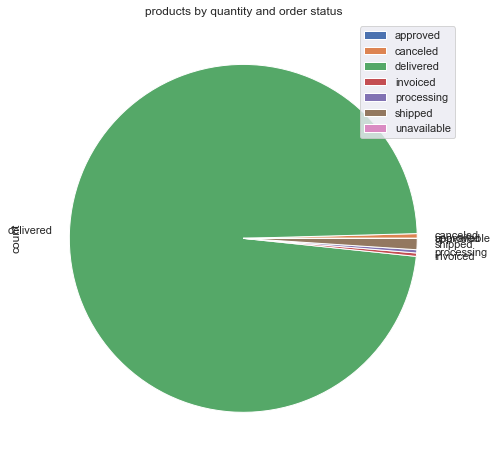

In [77]:
rev = treated_df["order_status"]
count = [1 for i in range(len(rev))]
data = pd.DataFrame()
data["count"] = count
data["order_status"] = rev
data = data.groupby(["order_status"]).sum()
pie = data.plot.pie(y="count").set(title="products by quantity and order status")

We see from the pie chart above that most products have been delivered, except a few cancelled and or are unavailable.

In [78]:
treated_df["shipp_act_est"] = treated_df["shipping_est_duration"] - treated_df["shipping_duration"]

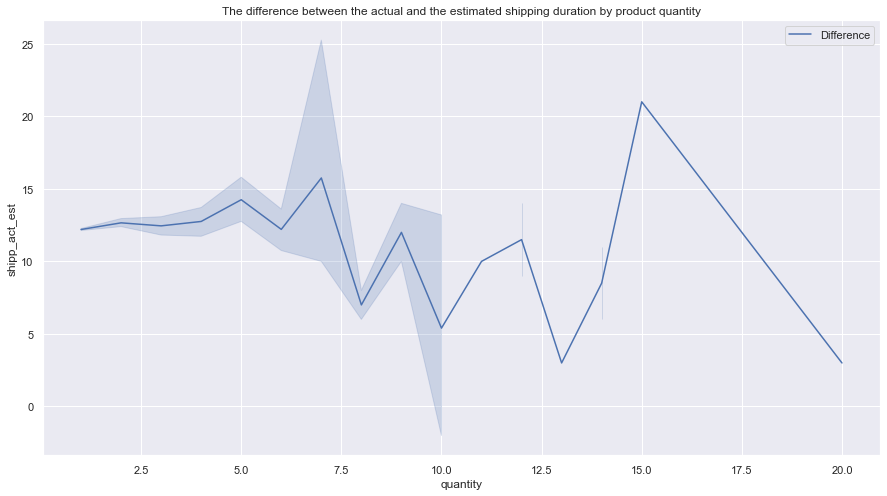

In [79]:
est_act_shipp =treated_df["shipp_act_est"]
qua = treated_df['quantity']
data = pd.DataFrame()
data["shipp_act_est"] = est_act_shipp
data["quantity"] = qua
data = data.sort_values(by="quantity", ascending=True)
fig,ax = plt.subplots()
ax = sns.lineplot(data = data,  x="quantity", y="shipp_act_est")
ax.set_title("The difference between the actual and the estimated shipping duration by product quantity")
plt.legend(labels = ["Difference"])

The above graph shows the difference between the estimated and the actual shipping duration. We see that the line is almost always above 0, which means that most orders arrive before the estimated time.

In [80]:
treated_df = treated_df.drop(["shipp_act_est"], axis = 1)

## Products Dataviz

[Text(0.5, 1.0, 'Most bought products on the plateforme')]

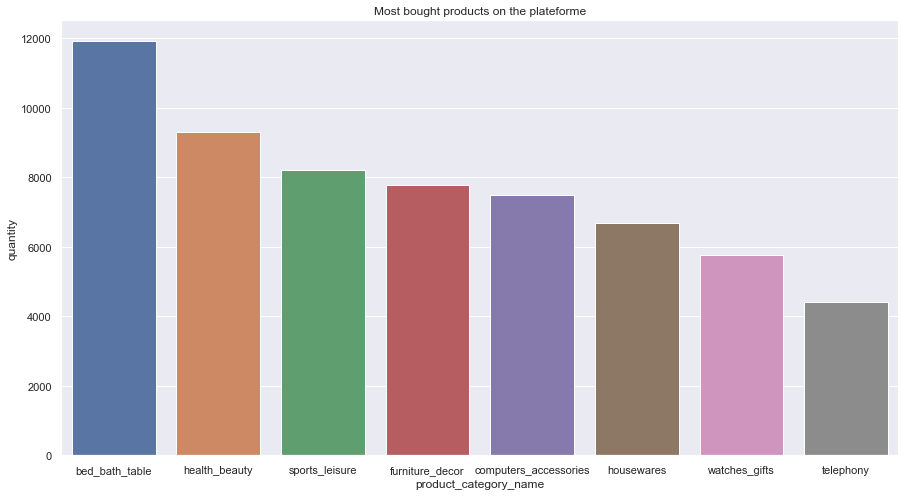

In [81]:
d = treated_df[["quantity","product_category_name"]].copy()
data = d.groupby(["product_category_name"]).sum().reset_index()
data = data.sort_values(by="quantity", ascending = False)
for_bar = data.head(8)
sns.barplot(data= for_bar, x="product_category_name", y="quantity").set(title="Most bought products on the plateforme")

The barplot shows us the most bought products on the plateforme. We see that tables for bed and bath are the represent the most sold quantity of all products on the plateforme.

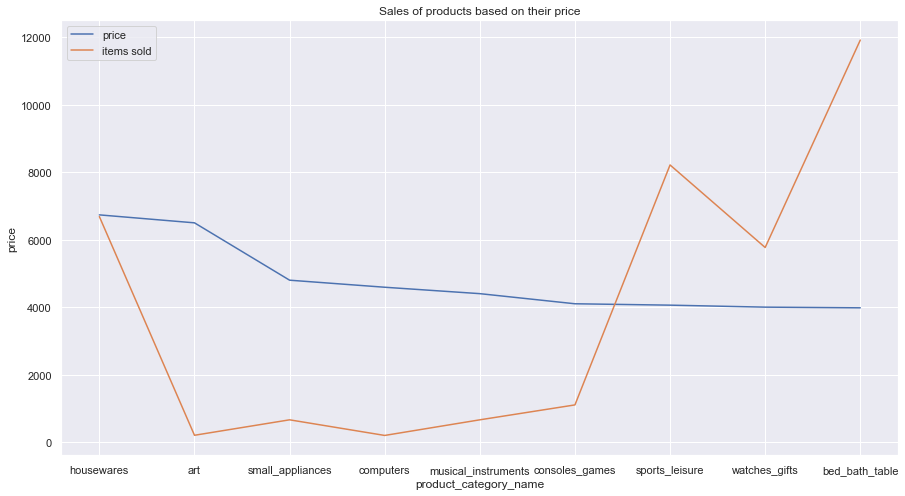

In [82]:
price = treated_df["price"]
cat = treated_df["product_category_name"]
qua = treated_df["quantity"]
data = pd.DataFrame()
data["price"] = price
data["product_category_name"] = cat
data["quantity"] = qua
data = data.groupby(["product_category_name"]).agg({"price":"max", "quantity":"sum"}).reset_index()
data = data.sort_values(by="price", ascending= False)
for_line = data.head(9)
fig,ax = plt.subplots()
ax = sns.lineplot(data = for_line,  x="product_category_name", y="price")
ax1 = sns.lineplot(data = for_line,  x="product_category_name",y="quantity")
ax.set_title("Sales of products based on their price")
plt.legend(labels = ["price","items sold"])

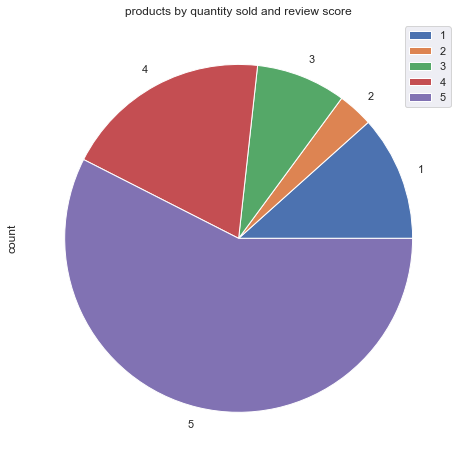

In [83]:
rev = treated_df["review_score"]
count = [1 for i in range(len(rev))]
data = pd.DataFrame()
data["count"] = count
data["review_score"] = rev
data = data.groupby(["review_score"]).sum()
pie = data.plot.pie(y="count").set(title="products by quantity sold and review score")

The pie chart above shows the product quantity sold by review score. We notice that more than half the products got a 5 out of 5 review score, and more than 3 thirds of the products sold are reviewed between 4 and 5 stars. Which means that the quality of the products sold on the plateform are mostly perfectly matching with the clientèle's needs.

In [84]:
treated_df["total_revenue"] = treated_df["price"] * treated_df["quantity"]

Here I added a new colum for the total money the seller got from selling the totality of his products on the plateforme, it is simply the quantity multiplied by the amount the price.

[Text(0.5, 1.0, 'Total revenue by product photo quantity')]

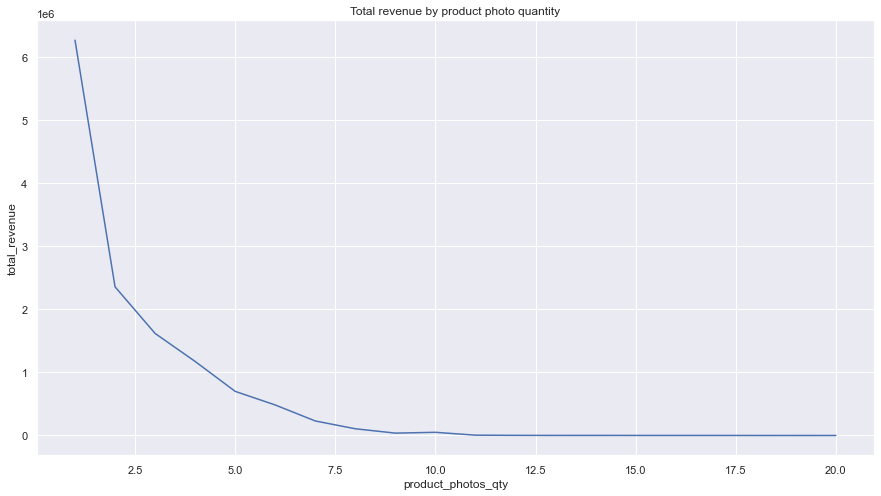

In [85]:
rev = treated_df["total_revenue"]
photo = treated_df["product_photos_qty"]
data = pd.DataFrame()
data["total_revenue"] = rev
data["product_photos_qty"] = photo
data = data.groupby("product_photos_qty").sum().reset_index()
sns.lineplot(data = data, x = "product_photos_qty", y = "total_revenue").set(
title = "Total revenue by product photo quantity")

Opposite to what I thought, the products that have less pictures on their ads are the sold more than those that have more pictures.

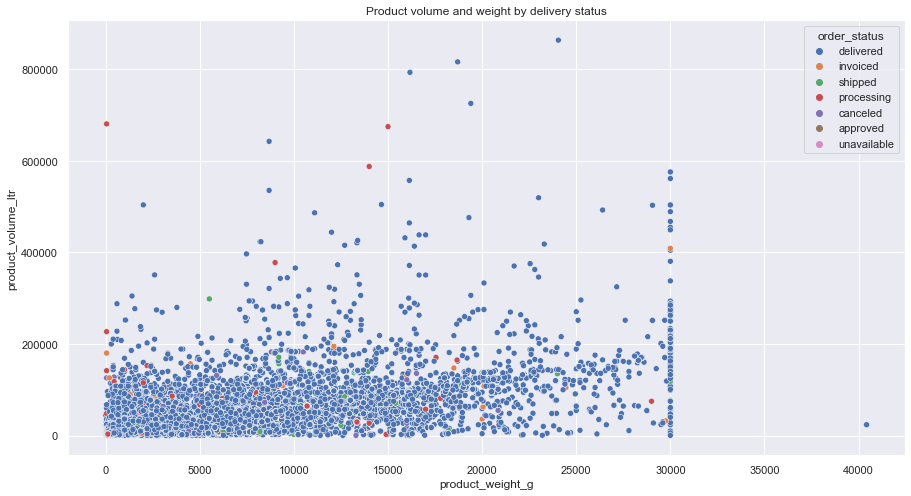

In [86]:
w = treated_df["product_weight_g"]
v = treated_df["product_volume_ltr"]
s = treated_df["order_status"]
data = pd.DataFrame()
data["product_weight_g"] = w
data["product_volume_ltr"] = v
data["order_status"] = s
scatter = sns.scatterplot(data = data, x = "product_weight_g",y="product_volume_ltr", 
                          hue="order_status").set(title ="Product volume and weight by delivery status" )

The scatter plot above shows the weight and volume of products by delivery status. We see that there are a lot of values of the weight 3000, that might be because the weights have been capped. And we notice that most products are light and small in volume and only a few of them have been canceled or are unavailable.

## Sellers dataviz

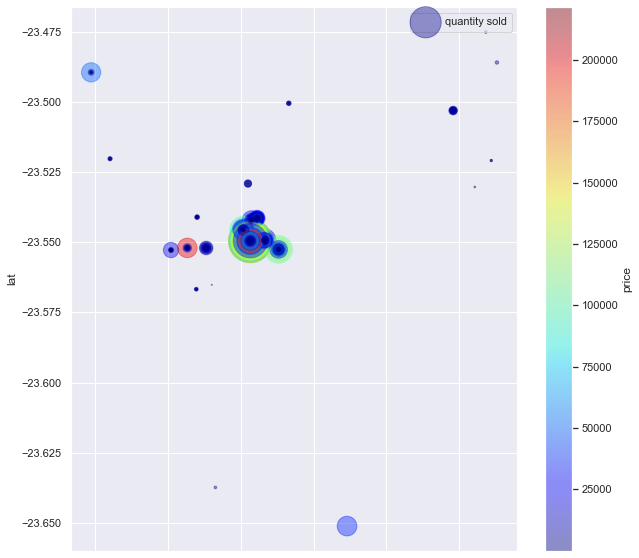

In [87]:
lat = treated_df["seller_lat"]
long = treated_df["seller_lng"]
ids = treated_df["seller_id"]
qua = treated_df["quantity"]
price = treated_df["price"]
data = pd.DataFrame()
data["lat"] = lat
data["long"] = long
data["seller_id"] = ids
data["quantity"] = qua
data["price"] = price
data = data.groupby(["seller_id"]).agg({"lat":"first","long":"first","quantity":"sum","price":"sum"})
data.plot(kind="scatter", x="long", y="lat", alpha=0.4,
 s=data["quantity"], label="quantity sold", figsize=(10,10),c="price",
  cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

The scatter map above shows us the quantities and revenue made by the sellers on the plateforme. The size of the circle represents the quantities sold, and the color represents the revenue gained, the hotter the color the higher the revenue.

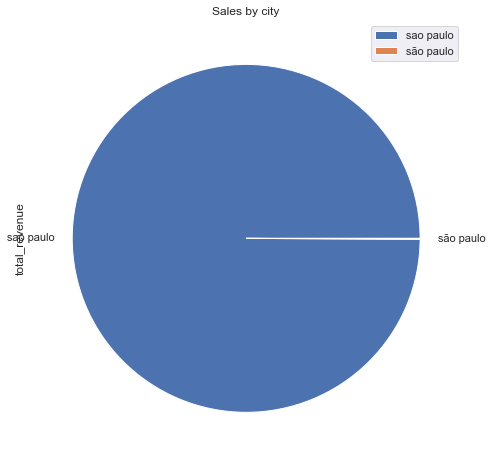

In [88]:
city = treated_df["seller_city"]
rev = treated_df["total_revenue"]
data = pd.DataFrame()
data["seller_city"] = city
data["total_revenue"] = rev
data = data.groupby(["seller_city"]).sum()
data = data.sort_values(by="total_revenue", ascending = False)
pie = data.plot.pie(y="total_revenue").set(title="Sales by city")

In the above chart I tried to see the cities that represent the most sales on the plateform, it turns out that Sao Paulo is the city from in which all the sellers are located. (The difference is just because of the accent on the a ). Athought the transformations I have made on the data before may have caused some cities to be replaced by sau paulo (I merged the data in the previous notebook by state because it is the one that led to the least data loss).

[Text(0.5, 1.0, 'Total revenue for the best 10 sellers')]

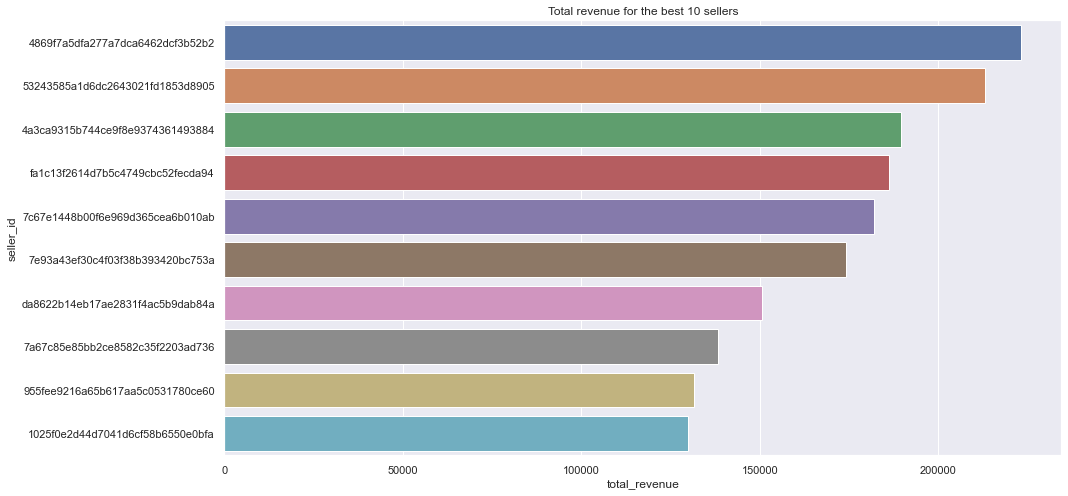

In [89]:
rev = treated_df["total_revenue"]
ids = treated_df["seller_id"]
data = pd.DataFrame()
data["total_revenue"] = rev
data["seller_id"] = ids
data = data.groupby(["seller_id"]).sum().reset_index()
data = data.sort_values(by="total_revenue", ascending= False)
data = data.head(10)
sns.barplot(data = data, x="total_revenue",y="seller_id").set(title="Total revenue for the best 10 sellers")

The bar chart above shows us the ids of the 10 best sellers, with the total revenue that they made on the plateform in the two years documented in the dataset.

[Text(0.5, 1.0, 'Sales by payment type')]

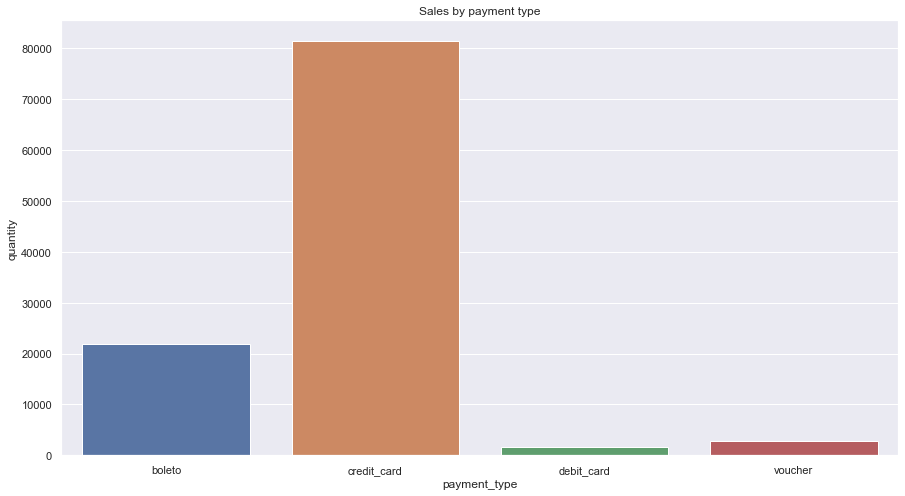

In [90]:
qua = treated_df["quantity"]
paytype = treated_df["payment_type"]
data = pd.DataFrame()
data["quantity"] = qua
data["payment_type"] = paytype
data = data.groupby(["payment_type"]).sum()
data = data.reset_index()
sns.barplot(data=data, x="payment_type",y="quantity").set(title="Sales by payment type")

We see from the bar chart above the payment methods that sellers use on the plateform. Most of them use credit cards, with some using cash (boleto), and a few using debit cards and vouchers.

## Customers Dataviz

[Text(0.5, 1.0, 'Purchases by city')]

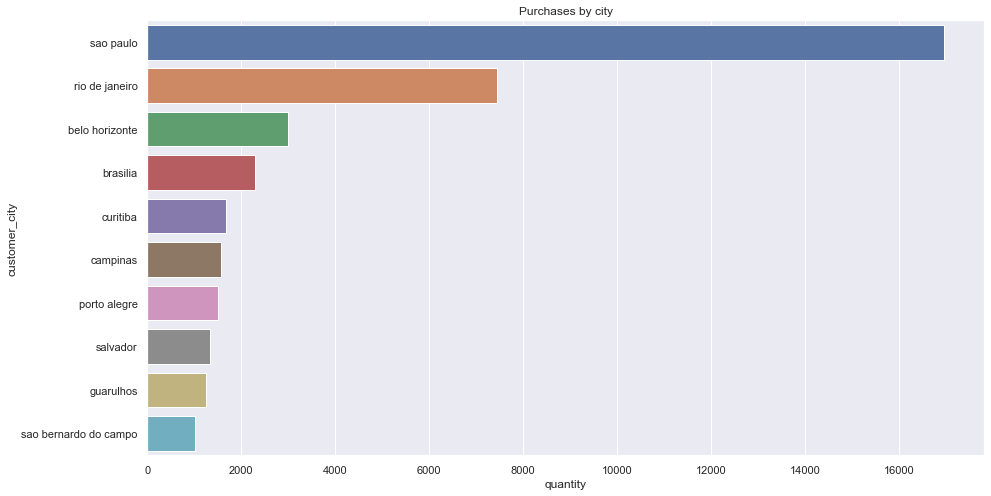

In [91]:
city = treated_df["customer_city"]
qua = treated_df["quantity"]
data = pd.DataFrame()
data["customer_city"] = city
data["quantity"] = qua
data = data.groupby(["customer_city"]).sum().reset_index()
data = data.sort_values(by="quantity", ascending = False)
data = data.head(10)
sns.barplot(data=data, x = "quantity", y="customer_city").set(title="Purchases by city")

The bar chart abpve shows the quanities bought in the top 10 cities, we notice that Sao Paulo has the most business, followed by Rio de Janeiro and Belo Horizonte

[Text(0.5, 1.0, 'Payment value by number of installements')]

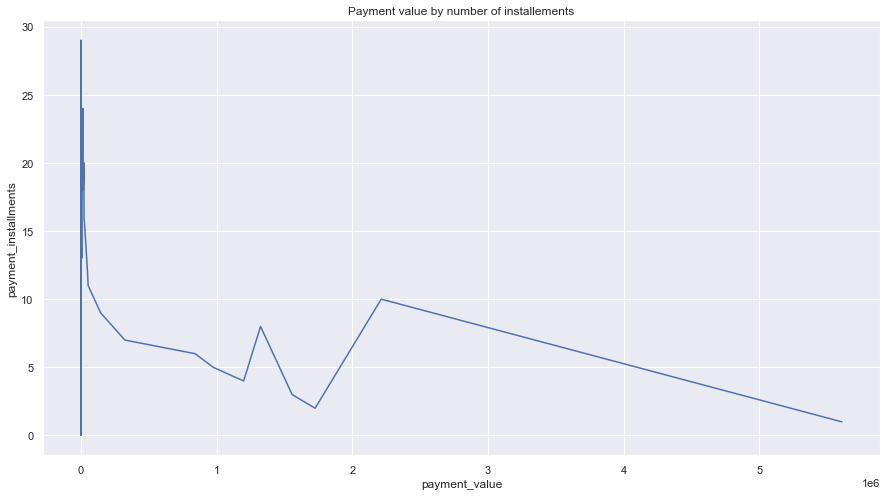

In [92]:
v = treated_df["payment_value"]
i = treated_df["payment_installments"]
data = pd.DataFrame()
data["payment_value"] = v
data["payment_installments"] = i
data = data.groupby(["payment_installments"]).sum().reset_index()
data = data.sort_values(by="payment_installments",ascending= False)
sns.lineplot(data = data, x="payment_value",y="payment_installments").set(title="Payment value by number of installements")

The line plot above shows us the installements number by payment value (represented in millions of units). We see that the purchases of lower values take up more installements that purchases of higher values.

[Text(0.5, 1.0, 'review score by review answer difference')]

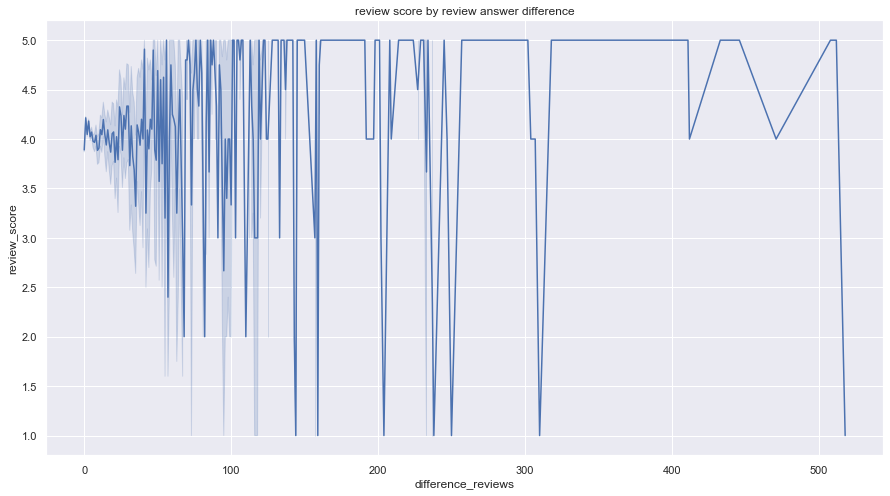

In [93]:
d = treated_df["difference_reviews"]
rev = treated_df["review_score"]
data = pd.DataFrame()
data["difference_reviews"] = d
data["review_score"] = rev
#data = data.groupby(["review_score"]).agg({"difference_reviews":"sum"}).reset_index()
data = data.sort_values(by="review_score", ascending=False)
sns.lineplot(data = data, x="difference_reviews",y="review_score").set(title="review score by review answer difference")

Opposite to what I thought, there isn't really any obvious relationship between the how fast the review was answered by the seller and the score the review got. 

In [94]:
treated_df = treated_df.drop(["difference_reviews"], axis = 1)

## Shippments Dataviz

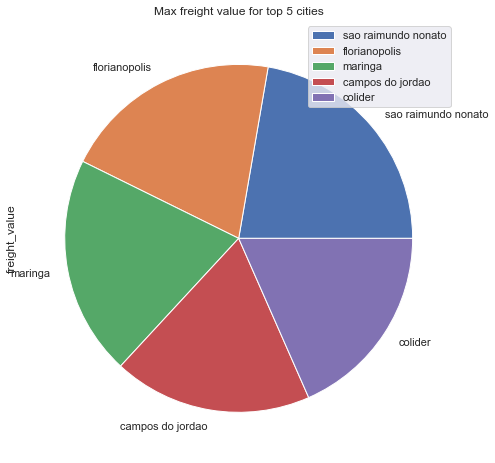

In [95]:
f = treated_df["freight_value"]
c = treated_df["customer_city"]
data = pd.DataFrame()
data["freight_value"] = f
data["customer_city"] = c
data = data.groupby(["customer_city"]).agg({"freight_value":"max"})
data = data.sort_values(by="freight_value",ascending=False)
data = data.head(5)
pie = data.plot.pie(y="freight_value").set(title="Max freight value for top 5 cities")

The pie chart above shows the Maximum transportation values in the 5 top cities. Notice that I while grouping the dataset, I used max instead of sum, because while most of the business accures in Sau Paulo and Rio de Janeiro, I didn't want the quantity of the sales to compromise the freight value (the more sales are the higher the freight values because of repetitiveness).
The graph shows the top five cities with the highest freight values, the reason is that those cities are either located in the north (far from Sao Paulo) and/or are small communities to which there isn't cheap convenient transportation. 

### Time series

In [96]:
d = treated_df["shipping_duration"]
ed = treated_df["shipping_est_duration"]
p = treated_df["purchase_date"]
data = pd.DataFrame()
data["shipping_est_duration"] = ed
data["shipping_duration"] = d
data["purchase_date"] = p

In [97]:
data["purchase_date"]= data['purchase_date'].astype('datetime64')
def datetime_to_int(dat, cols):
    for col in cols:
        dat[col] = dat[col].values.astype(np.int64)
datetime_to_int(data, ["purchase_date"])
data = data.groupby("purchase_date").agg({"shipping_duration":"sum","shipping_est_duration":"sum"}).reset_index()

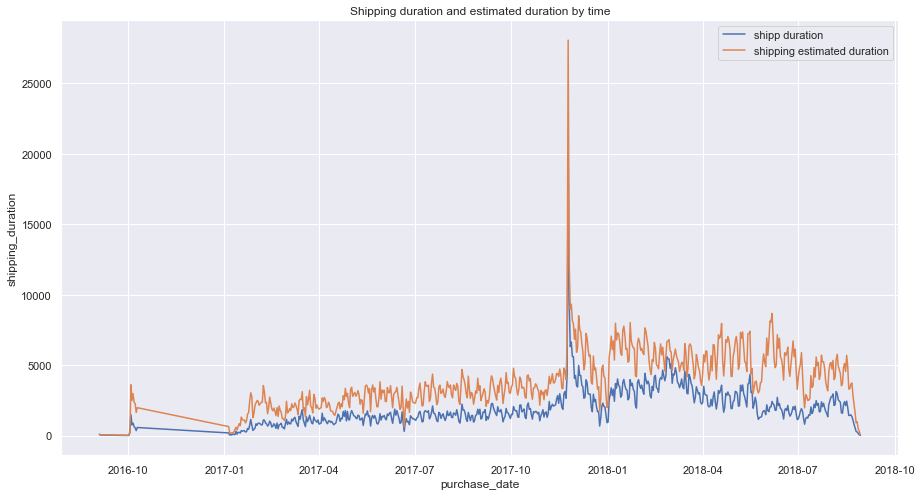

In [98]:
data["purchase_date"]= data['purchase_date'].astype('datetime64[ns]')
data = data.sort_values(by="purchase_date",ascending=True)
fig,ax = plt.subplots()
ax = sns.lineplot(data = data,  x="purchase_date", y="shipping_duration")
ax1 = sns.lineplot(data = data,  x="purchase_date",y="shipping_est_duration")
ax.set_title("Shipping duration and estimated duration by time")
plt.legend(labels = ["shipp duration","shipping estimated duration"])

In this part I created a time series to be able to see the duration of shipping and estimated duration of shipping by time.
Before doing that,I first had to convert the time column from object to time series, and since pandas cannot group dataframes by time series, I converted them into integers and then back to time series. 
The result shows that for almost all orders, the shipping duration is shorter than the estimated duration, and that clients get their packages before estimated.

## Revenue Dataviz

In [99]:
p = treated_df["purchase_date"]
r = treated_df["total_revenue"]
data = pd.DataFrame()
data["purchase_date"] = p
data["total_revenue"] = r
data["purchase_date"]= data['purchase_date'].astype('datetime64')

In [100]:
def datetime_to_int(dat, cols):
    for col in cols:
        dat[col] = dat[col].values.astype(np.int64)
datetime_to_int(data, ["purchase_date"])
data = data.groupby("purchase_date").sum().reset_index()

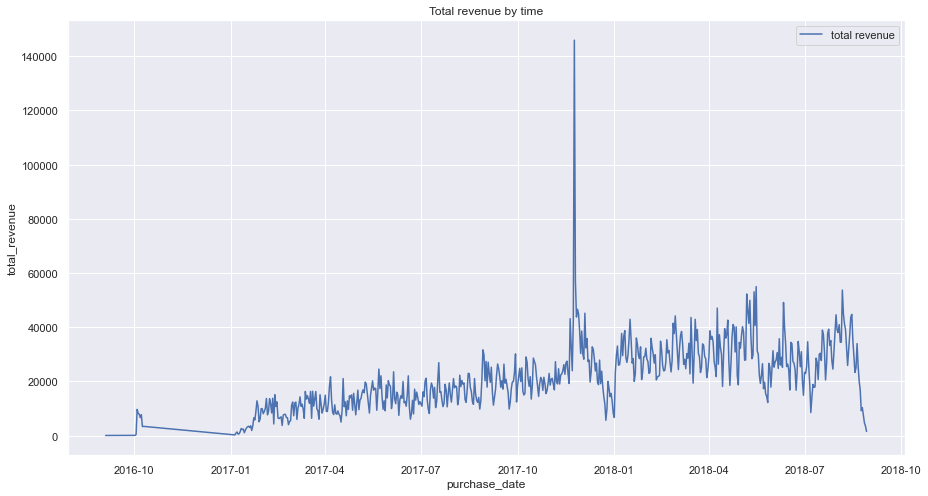

In [101]:
data["purchase_date"]= data['purchase_date'].astype('datetime64[ns]')
data = data.sort_values(by="purchase_date",ascending=True)
fig,ax = plt.subplots()
ax = sns.lineplot(data = data,  x="purchase_date", y="total_revenue")
ax.set_title("Total revenue by time")
plt.legend(labels = ["total revenue"])

The line plot above shows us the total revenue of the sellers on the plateform by time. We see that the general trend is increase though fluctuating, and that there has been a period of very high increase followed by a steep decrease between December 2017 and January 2018. Also the revenue decreases sharply by September 2018. 

In [102]:
q = treated_df["quantity"]
p = treated_df["purchase_date"]
s = treated_df["review_score"]
data = pd.DataFrame()
data["quantity"] = q
data["purchase_date"] = p
data["review_score"] = s
data["purchase_date"]= data['purchase_date'].astype('datetime64')

In [103]:
def datetime_to_int(dat, cols):
    for col in cols:
        dat[col] = dat[col].values.astype(np.int64)
datetime_to_int(data, ["purchase_date"])
data = data.groupby("purchase_date").agg({"quantity":"sum","review_score":"mean"}).reset_index()

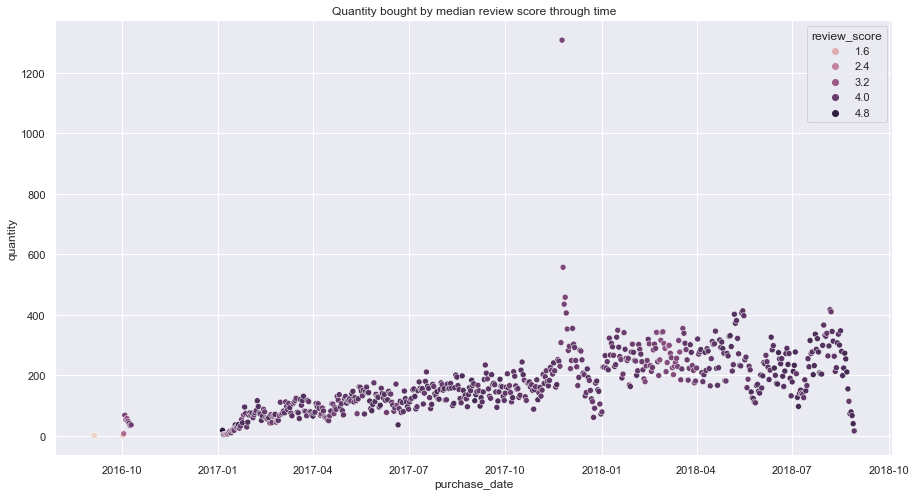

In [104]:
data["purchase_date"]= data['purchase_date'].astype('datetime64[ns]')
data = data.sort_values(by="purchase_date",ascending=True)
scatter = sns.scatterplot(data = data, x = "purchase_date",y="quantity", 
                          hue="review_score").set(title ="Quantity bought by median review score through time" )

The scatter plot above shows the quantities sold over time by review score. It looks very similar to the line plot before because the quantities like the revenue have increased and then steeply decreased during the new year season of 2017, and also declined through Septemer 2018.

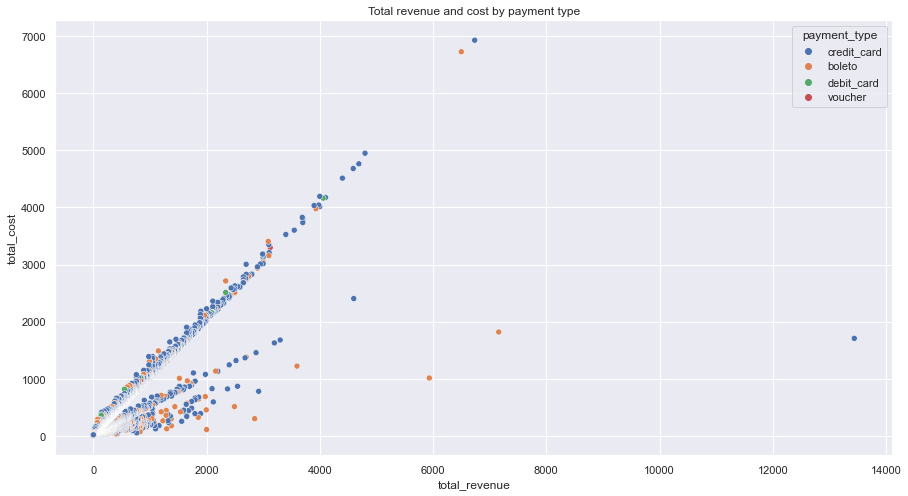

In [105]:
r = treated_df["total_revenue"]
t = treated_df["payment_type"]
c = treated_df["Total_cost"]
data = pd.DataFrame()
data["total_revenue"] = r
data["payment_type"] = t
data["total_cost"] = c
#data = data.groupby(["payment_type"]).agg({"total_revenue":"sum","total_cost":"sum"}).reset_index()
data = data.sort_values(by="total_revenue", ascending=False)
scatter = sns.scatterplot(data = data, x = "total_revenue",y="total_cost", 
                          hue="payment_type").set(title ="Total revenue and cost by payment type" )

The scatter plot above shows us the total revenue and total cost by payment type. Like before, we see that credit cards are the mostly used and the relationship between the cost and revenue is obviously linear.

## Deleting date columns

In [106]:
treated_df = treated_df.drop(["purchase_date","delivered_date","est_del_date"], axis = 1)

After the exploratory data analysis, it's time to prepare the dataset for the final step, machine learning. And since our problematic here is to cluster clients, and not see the change over time, we won't be needing the columns containing dates.

## Deleting ids columns

In [107]:
treated_df = treated_df.drop(["order_id","product_id","seller_id","customer_id"], axis = 1)

Then I deleted column containing ids because they are not really relevant for our case.

## Deleting geolocation lat and lng columns

In [108]:
treated_df = treated_df.drop(["seller_lat", "seller_lng"],axis=1)

Then I deleted the latitude and longitude columns for the same reasons.

## Correlations

<AxesSubplot:>

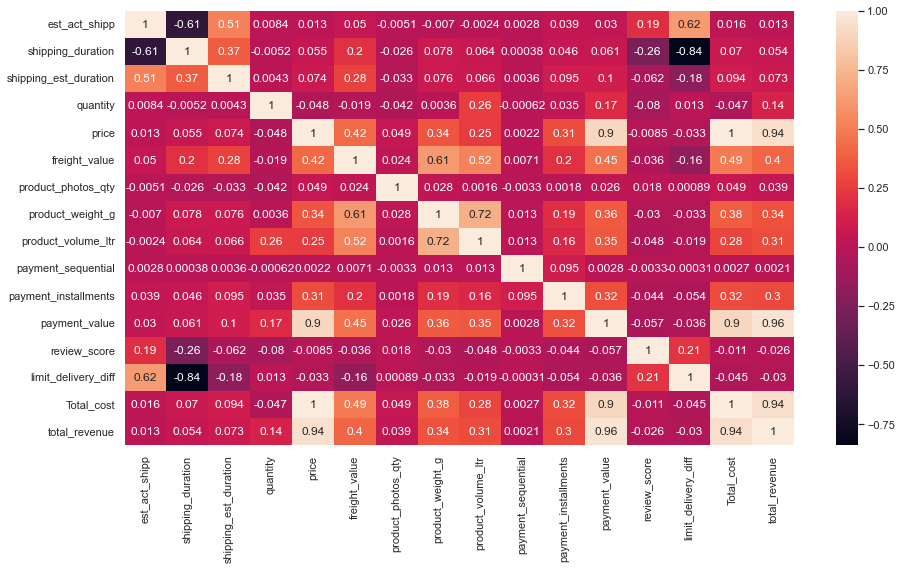

In [109]:
sns.heatmap(treated_df.corr(), annot = True)

The correlations heatmap above shows us the following :
- A negative 0.61 corr between the shipping duration and the difference between the actual and estimated shipping duration, when the first increases the second decrease and vice versa, because the shipping duration was actually used to calculated the shipping difference.
- A positive 0.51 correlation between the shipping estimated duration and the difference between the actual and estimated duration for the same reason.
- A positive 0.19 corr between the review score and the est_act_shipp (the difference), meaning that the review scores tend to be slightly higher when the package arrives to the customer earlier.
- A positive 0.62 corr between the est_act_shipp and the limit deviery difference, the first one give us the difference between the estimated and actual delivery and the second gives us the difference between the limit and actual delivery. 
- A positive 0.2 corr between the shipping duration and freight value, meaning that when the first increases the second is likely to increase too.
- A negative 0.26 corr between the shipping duration and review score.
- A negative 0.84 between the shipping duration andf limit delivery difference.
- A positive 0.26 corr between the quantity and the volume.
- A postive 0.42 between the price and freight value
- A positive 0.9 corr between the price and payment value (must be mostly indentical)
- Important positive correlations between the price and the product weight, valume, payment installments and total revenue.

... etc

All in all, there seems to be some important correlations between the features, especially those added during feature engineering.

## Saving the dataset for ML algorithms 

In [110]:
treated_df.head()

,order_status,est_act_shipp,shipping_duration,shipping_est_duration,quantity,price,freight_value,product_photos_qty,product_weight_g,product_volume_ltr,...,payment_value,review_score,seller_city,seller_state,customer_city,customer_state,product_category_name,limit_delivery_diff,Total_cost,total_revenue
1710,delivered,44,22,66,1,69.99,23.36,1.0,1200.0,5984.0,...,653.64,2,sao paulo,SP,vilhena,RO,furniture_decor,-18,93.35,69.99
1711,delivered,44,22,66,1,69.99,23.36,1.0,1200.0,5984.0,...,653.64,2,sao paulo,SP,vilhena,RO,furniture_decor,-18,93.35,69.99
1712,delivered,44,22,66,1,280.00,84.96,1.0,4000.0,43680.0,...,653.64,2,sao paulo,SP,vilhena,RO,furniture_decor,-3,364.96,280.00
2041,delivered,-1,19,18,1,112.00,11.44,3.0,1400.0,14036.0,...,123.44,2,sao paulo,SP,sao paulo,SP,furniture_decor,-15,123.44,112.00
2042,delivered,10,10,20,1,284.90,44.22,4.0,20300.0,113652.0,...,329.12,4,sao paulo,SP,taubate,SP,furniture_decor,-5,329.12,284.90


In [111]:
treated_df.to_csv("treated_ML.csv", index = False)

Finally, I saved a copy of the dataframe with only the columns suitable for machine learning algorithms which I'll use in the next notebook.

## Conclusion 

In this notebook, we did some feature engineering, visualized some of the key aspects of the business and saved a dateframe containing only important features for ML.